In [ ]:
##### import wind 
import sigma_data as sd
import math 
import numpy as np
import matplotlib.pyplot as plt

## Initialization 

In [293]:
#to bring in data to use
data = []
for line in open("H2 data"):
    fields = [float(s) for s in line.split()]
    
    data.append(fields)
#print(data)

In [294]:
radius = np.linspace(1E12,1E13,100)
#radius=np.array([1E12,1,1])
#sigma=3.355E-01
sigma=sd.makeHistogram(sd.interpolated_data(data,1E-3))
#print(sigma)


7.214


In [295]:
def velocity (v_not,v_terminal,r_star,m_wind,r):
    #change v_not units
    v_not=v_not*100000
    v_terminal=v_terminal*100000
    m_wind=m_wind*1.989E33/3.154E7
    #r is the radius 
    
    
    v=v_not+(v_terminal-v_not)*(1-(r_star/r))
    
    return v
    

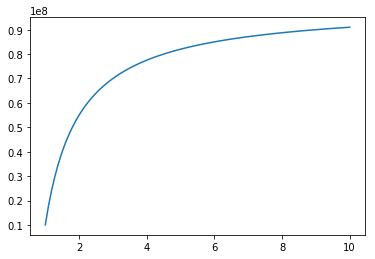

In [296]:
v=velocity(100,1000,1E12,1E-8,radius)
plt.plot(radius/1E12,v)
plt.show()

In [448]:
def densityAndVelocity (v_not,v_terminal,r_star,m_wind,r):
    v_not=v_not*100000
    v_terminal=v_terminal*100000
    m_wind=m_wind*1.989E33/3.154E7
    m_wind=m_wind*1.989E33/3.154E7
    v=v_not+(v_terminal-v_not)*(1-(r_star/r))
    rho = m_wind/(4*math.pi*r**2*v)
    return rho,v
   

    


In [450]:
rho,v=densityAndVelocity(100,1000,1E12,1E-8,radius)

In [452]:

print(v)



[10000000.         17500000.         23846153.84615385 29285714.28571429
 34000000.         38125000.         41764705.88235293 44999999.99999999
 47894736.84210526 50500000.00000001 52857142.85714286 55000000.
 56956521.73913043 58750000.00000001 60399999.99999999 61923076.92307692
 63333333.33333333 64642857.14285715 65862068.96551725 67000000.
 68064516.12903227 69062500.         70000000.         70882352.94117647
 71714285.71428572 72500000.         73243243.24324325 73947368.42105263
 74615384.61538461 75250000.         75853658.53658536 76428571.42857143
 76976744.18604651 77500000.         78000000.         78478260.86956522
 78936170.21276596 79375000.         79795918.36734694 80200000.
 80588235.29411764 80961538.46153846 81320754.71698114 81666666.66666667
 82000000.         82321428.57142857 82631578.94736841 82931034.48275863
 83220338.98305085 83500000.         83770491.80327868 84032258.06451613
 84285714.28571428 84531250.         84769230.76923077 85000000.
 85223880.

In [300]:

def LambdaX(rho,sigma):
    lambda1=1/rho*sigma
    
    #print (lambda1)
    return lambda1


In [301]:
LambdaX(density(velocity(100,1000,1E12,1E-8,radius),1E-8,radius))

array([1.43751673e+15, 2.99383650e+15, 4.78776233e+15, 6.81929424e+15,
       9.08843222e+15, 1.15951763e+16, 1.43395264e+16, 1.73214826e+16,
       2.05410448e+16, 2.39982132e+16, 2.76929876e+16, 3.16253681e+16,
       3.57953546e+16, 4.02029472e+16, 4.48481459e+16, 4.97309507e+16,
       5.48513615e+16, 6.02093784e+16, 6.58050014e+16, 7.16382304e+16,
       7.77090656e+16, 8.40175068e+16, 9.05635540e+16, 9.73472073e+16,
       1.04368467e+17, 1.11627332e+17, 1.19123804e+17, 1.26857881e+17,
       1.34829565e+17, 1.43038855e+17, 1.51485751e+17, 1.60170253e+17,
       1.69092361e+17, 1.78252075e+17, 1.87649395e+17, 1.97284321e+17,
       2.07156853e+17, 2.17266991e+17, 2.27614736e+17, 2.38200086e+17,
       2.49023043e+17, 2.60083605e+17, 2.71381774e+17, 2.82917549e+17,
       2.94690930e+17, 3.06701917e+17, 3.18950510e+17, 3.31436709e+17,
       3.44160514e+17, 3.57121925e+17, 3.70320942e+17, 3.83757565e+17,
       3.97431795e+17, 4.11343630e+17, 4.25493072e+17, 4.39880119e+17,
      

In [302]:
# integral function
import numpy as np
def integrate(f, a, b, N):
#f is the function
# a and b are the limits of integration 
#N is the number of interations 
    x = np.linspace(a, b, N)
    
    
    fx = f(x)
    area = np.sum(fx)*(b-a)/N
    return area

In [303]:
area=integrate(lambda x:1/LambdaX(density(velocity(100,1000,1E12,1E-8,x),1E-8,x)),1E12,1E13,10000)

print(area)

0.0001709827226423142


In [368]:
def propagate(x,phi_angle,N_lambda):
#nLambda=.00017098
#n lambda is the number of mean free paths 
#we  then solve for b to determine where the interaction location is 
    sumLambda = 0
    ldx=1E8
    listL=[]
    klist=[]
    x=xstart
    #print(x)
#dx is how far it goes during each step
#ldx is where it is from the starting point
    #for i in range(len(phi)):

        
        
    dx=np.array([ldx*math.cos(angle),ldx*math.sin(angle),0])  
        
        
    while sumLambda < nLambda:
            #dx=np.array([ldx*math.cos(phi[i]),ldx*math.sin(phi[i]),0])
        r=math.sqrt(x[0]**2+x[1]**2+x[2]**2)
        
    
        sumLambda += ldx/LambdaX(density(velocity(100,1000,1E12,1E-8,r),1E-8,r))
        L=LambdaX(density(velocity(100,1000,1E12,1E-8,r),1E-8,r))
        listL.append(L)
        k=length(xstart-x)
        klist.append(k)
        
        x=x+dx
            
        if r<=1E12:
            print("hit star",angle)
            break 
        if r>= 5E13:
             break 
        
            
       
    
    return x,listL,blist
    #print(x)
        #print(phi[i])
        #plt.plot(x1,phi[i],'.')
#print(sumLambda)
#x would be position in 3d space
#dx would be like a velcoity vector 
#phi azimuth angle in radians 
#need to plot absoulte vavlue of new x minus starting point 
        

#for ploting when i plot the absoulte value im currently plotting the three numbers in the vector is there a way
#to keep track of all the numbers in the loop to plot it that way?

    
        
    

ValueError: x and y must have same first dimension, but have shapes (1,) and (485001,)

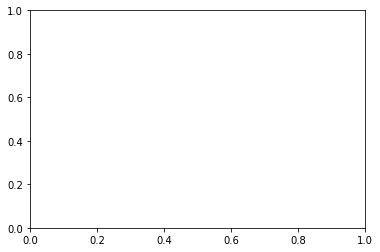

In [369]:
xstart=np.array([1.5E12,0,0])
phi=np.linspace(0,2*math.pi,30)
nLambda=.00017098
#plt.plot(1E12,'y.')
for angle in phi:
    
    xnew,listL,blist=propagate(xstart,angle,nLambda)
    deltax=xnew-xstart
    distance=math.sqrt(deltax[0]**2+deltax[1]**2+deltax[2]**2)
       
    #print(distance)
    #ax = plt.gca()
    #ax.set_xlim((-2E13, 5E13))
    #plots end point for photon
    #plt.plot(deltax[0],deltax[1],'r.')
    #plots star
    #circle = plt.Circle((0, 0), 1E12, color='y')
    
    #ax.set_xlim((-5E13, 5E13))
    #ax.set_ylim((-5E13, 5E13))
    #ax.add_artist(circle)
    #plots starting point
    #plt.plot(xstart[0],xstart[1],'y.')
    plt.plot(blist,listL)

In [306]:
def length (p):
    length=math.sqrt(p[0]**2+p[1]**2+p[2]**2)
    return length

In [307]:
aS=np.array([0,1/5,3/10,3/5,1,7/8])
cS=np.array([37/378,0,250/621,125/594,0,512/1771])
cSstar=np.array([2825/27648,0,18575/48384,13525/55296,277/14336,1/4])



In [432]:
def Integrating(h,n_lambda,angle):
#h=.033 #starting step size
    phi=angle
    integral=0.0 
    oldintegral=0.0
    s=.95 #saftey factor
    epsilon=1E-6 #desired relative accuracy
    x0=np.array([1.5E12,0,0]) #x starting point
    x=x0
    lv=3E10
    v=np.array([lv*math.cos(phi),lv*math.sin(phi),0]) #velocity vector
    ldx=h*length(v) 
    #n_lambda=.00017098 #number of mean free paths
    lv=length(v) #length of v
    
    xpoints=[]
    integralold=[]
    integralnew=[]
    listdelta=[]
    hlist=[]
    alambda=[]
    blist=[]
    while integral < n_lambda and oldintegral < n_lambda:
        
        points=[x+a*h*v for a in aS] #calculates diffrent vectors for each a
        
        radii=np.array([ length(p) for p in points]) #calculates the length of each vector
        
        invlambda=1/LambdaX(density(velocity(100,1000,1E12,1E-8,radii),1E-8,radii))
    
        ks=lv*h*invlambda 
        
        delta=abs(np.dot((cS-cSstar),ks))
        
        
        
        newintegral=integral+ np.dot(ks,cS)
        
        
    
        delta0=epsilon*newintegral
    
        
    #caluclates how h should be changed
        
        if delta0 >= delta:
            h=h*s*(delta0/delta)**(1/5)
        else :
            h=h*s*(delta0/delta)**(1/4)
            continue
    #ldx=h*length(v)
        xpoints.append(length(x))
        
        
        integral=newintegral
        integralnew.append(newintegral)
        listdelta.append(delta)
        hlist.append(h)
        
        x=x+h*v
    #oldintegral += ldx/LambdaX(density(velocity(100,1000,1E12,1E-8,length(x)),1E-8,length(x)))
        a=np.array(LambdaX(density(velocity(100,1000,1E12,1E-8,length(x)),1E-8,length(x))))
    #integralold.append(oldintegral)
        alambda.append(a)
    
    
    
        b=np.array(length(x0-x))
        blist.append(b)
    #breaks the loop if the photon does not interact 
        if length(x) <=1E12:
            print("hit star",angle)
            break 
        if length(x) > 1E13:
            print("escaped",angle)
            break
        
    return xpoints,listdelta,hlist,integralnew,alambda,x,blist
#plt.plot(xpoints,integralold,'r')
#plt.plot(xpoints,integralnew,'b')    
    #plt.plot(b,a,'.r')
#plt.plot(xpoints,hlist)   
#plt.plot(xpoints,listdelta)
#plt.plot(xpoints,np.array(integralold)-np.array(integralnew),'r')
#print(integralnew[-1])
plt.show()


In [409]:
angle=0
nLambda=.00017098
angle=0
h=.033
xpoints,listdelta,hlist,integralnew,a,x,b=Integrating(h,nLambda,angle)
print (hlist)


[1.2978934252864123, 2.915889607587118, 4.19006325389676, 5.5590883633975485, 7.208622007371762, 9.28274585927529, 11.94765915803761, 15.4240543217409, 20.020248887370002, 26.177913088139977, 34.54117726041194, 46.06503697773091, 62.18966506694997, 85.12698622865277]


In [453]:
angle=0
nLambda=.00017098
h=.033
xpoints,listdelta,hlist,integralnew,a,x,b=Integrating(h,nLambda,angle)

plt.plot(xpoints,listdelta,'b')
plt.ylabel('step size cm')
plt.xlabel('x values')
plt.title('Step Size VS X-Points')
print(integralnew)
plt.show()


TypeError: density() missing 2 required positional arguments: 'm_wind' and 'r'

escaped 0
[7.643257515290766e-08, 2.717481463261252e-06, 7.456949213801055e-06, 1.2737247372487717e-05, 1.8012431604676454e-05, 2.3026073864314214e-05, 2.7639743383257137e-05, 3.178138385360025e-05, 3.5422899288297496e-05, 3.856673219005369e-05, 4.123613556830707e-05, 4.3467645050491966e-05, 4.530528182128071e-05, 4.679623802896823e-05]


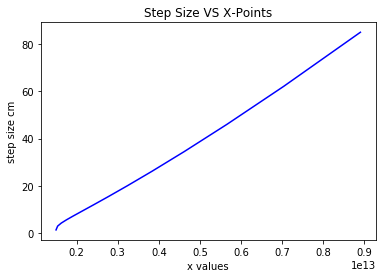

In [438]:
angle=0
nLambda=.00017098
h=.033
xpoints,listdelta,hlist,integralnew,a,x,b=Integrating(h,nLambda,angle)

plt.plot(xpoints,hlist,'b')
plt.ylabel('step size cm')
plt.xlabel('x values')
plt.title('Step Size VS X-Points')
print(integralnew)
plt.show()

escaped 0
[7.643257515290766e-08, 2.717481463261252e-06, 7.456949213801055e-06, 1.2737247372487717e-05, 1.8012431604676454e-05, 2.3026073864314214e-05, 2.7639743383257137e-05, 3.178138385360025e-05, 3.5422899288297496e-05, 3.856673219005369e-05, 4.123613556830707e-05, 4.3467645050491966e-05, 4.530528182128071e-05, 4.679623802896823e-05]


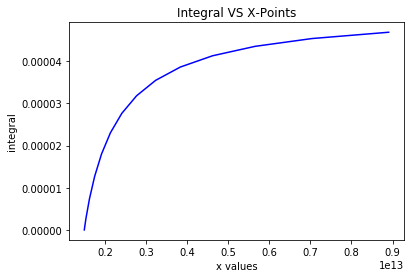

In [440]:
angle=0
nLambda=.00017098
h=.033
xpoints,listdelta,hlist,integralnew,a,x,b=Integrating(h,nLambda,angle)
print(integralnew)
plt.plot(xpoints,integralnew,'b')
plt.ylabel('integral')
plt.xlabel('x values')
plt.title('Integral VS X-Points')
plt.show()

escaped 0
[7.643257515290766e-08, 2.717481463261252e-06, 7.456949213801055e-06, 1.2737247372487717e-05, 1.8012431604676454e-05, 2.3026073864314214e-05, 2.7639743383257137e-05, 3.178138385360025e-05, 3.5422899288297496e-05, 3.856673219005369e-05, 4.123613556830707e-05, 4.3467645050491966e-05, 4.530528182128071e-05, 4.679623802896823e-05]


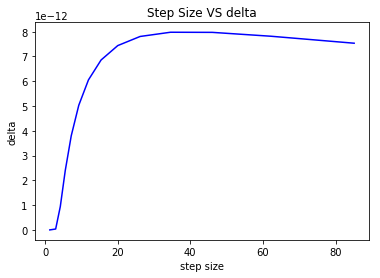

In [442]:
angle=0
nLambda=.00017098
h=.033
xpoints,listdelta,hlist,integralnew,a,x,b=Integrating(h,nLambda,angle)
print(integralnew)
plt.plot(hlist,listdelta,'b')
plt.ylabel('delta')
plt.xlabel('step size')
plt.title('Step Size VS delta')
plt.show()

escaped 0.0
escaped 0.7853981633974483
escaped 1.5707963267948966
escaped 2.356194490192345
hit star 3.141592653589793


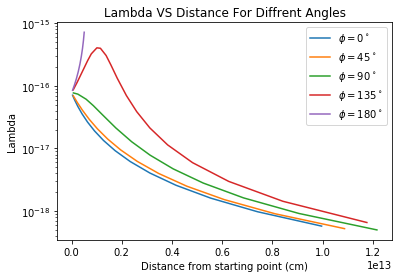

In [437]:
phi=np.linspace(0,math.pi,5)
nLambda=.0017098
h=.033
x0=np.array([1.5E12,0,0])
#plt.plot(1E12,'y.')
for angle in phi:
    
    xpoints,listdelta,hlist,integralnew,alist,x,blist=Integrating(h,nLambda,angle)
    #deltax=xpoints-x0
    #distance=math.sqrt(deltax[0]**2+deltax[1]**2+deltax[2]**2)
    
    plt.plot(blist,1/np.array(alist),label=r'$\phi=%.0f^\circ$' %(angle*180/math.pi,))
    plt.legend(loc='upper right')
plt.yscale('log')
plt.ylabel('Lambda')
plt.xlabel('Distance from starting point (cm)')
plt.title('Lambda VS Distance For Diffrent Angles')
plt.show()